# 01 - Introduction

In this notebook you can find example code to retrieve stock information and visualize it.

In [1]:
import sys
sys.path.insert(0, '../')
%reload_ext autoreload
%autoreload 2
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Start server

The `Server` class is the interface to perform HTTPS requests to acquire data regarding instruments, like stocks.

In [2]:
import time
import logging

import seaborn as sns
from matplotlib import pyplot as plt

from modules.server import Server

In [3]:
srv = Server()
srv.start()

# you can optionally silence the logging output uncommenting the following
# logging.getLogger('ibkr-algotrading').setLevel(logging.WARN)

Once started, we can request information on any stock we want simply by accesing items in `srv`. These will be cached, so only the first access will have significant delay.

In [4]:
# request stock and time performance
start_t = time.perf_counter()
stock = srv['SPY']
stop_t = time.perf_counter()

print(f'Retrieved: {stock}')
print(f'Requesting stock took {stop_t - start_t:.4f}s')

[2021-08-27 00:31:07,940] I T140030966232640 server.py:224: Started StockCache thread for bar "1h". 
		Next data update will be in  1732.06s.


Retrieved: Stock("SPY", conid=756733)
Requesting stock took 0.8326s


In [5]:
%%timeit
srv['SPY']

169 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can print and visualize the historical of the stock,

In [6]:
stock.hist

,open,close,high,low,volume
date,,,,,
2021-07-28 13:30:00,439.68,438.60,439.84,438.11,46300
2021-07-28 14:00:00,438.60,439.31,439.58,438.16,62116
2021-07-28 15:00:00,439.31,439.27,439.54,438.88,38751
2021-07-28 16:00:00,439.27,438.62,439.34,438.41,27093
2021-07-28 17:00:00,438.63,438.20,438.72,437.91,33676
...,...,...,...,...,...
2021-08-26 15:00:00,446.91,447.50,447.91,446.18,73690
2021-08-26 16:00:00,447.50,447.72,448.09,447.49,31902
2021-08-26 17:00:00,447.71,447.49,447.91,447.16,31349


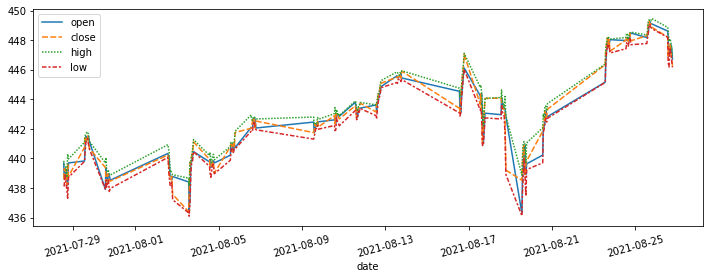

In [7]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stock.hist[y])
plt.xticks(rotation=15)
plt.show()

## Different time intervals

We can specify the period and bar (time step) to get different time intervals and resolutions on the stock's value.

In [8]:
period = '5y'
bar = '1d'
stock = srv['SPY', period, bar]
print('Number of data points: ', len(stock.hist))

[2021-08-27 00:31:22,919] I T140030957839936 server.py:224: Started StockCache thread for bar "1d". 
		Next data update will be in  5317.08s.


Number of data points:  999


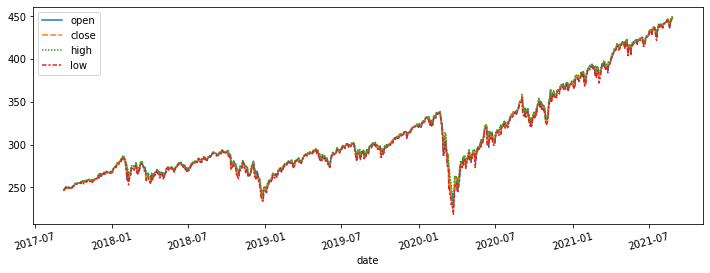

In [9]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stock.hist[y])
plt.xticks(rotation=15)
plt.show()

## Multiple stocks

You can acquire at once information about multiple stocks. Note that the time interval will be the same for all of them.

`Server` caches stocks following a [Least Recently Used (LRU)](https://en.wikipedia.org/wiki/Cache_replacement_policies#Least_recently_used_(LRU)) policy.

In [10]:
start_t = time.perf_counter()
for stk in srv[['SPY', 'AAPL', 'MSFT', 'TSLA']]:
    print(stk)
stop_t = time.perf_counter()
print(f'Elapsed time: {stop_t - start_t:.4f}s')

Stock("SPY", conid=756733)
Stock("AAPL", conid=265598)
Stock("MSFT", conid=272093)
Stock("TSLA", conid=76792991)
Elapsed time: 2.2839s


again, since the data is cached, only the first time they are accessed there will be a significant delay.

In [11]:
%%timeit
srv[['SPY', 'AAPL', 'MSFT', 'TSLA']]

250 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


we can also specify the period and bar for the multiple stocks,

In [12]:
period = '1y'
bar = '1d'
spy, aapl = srv[['SPY', 'AAPL'], period, bar]

print('SPY start and end dates:  ', spy.hist.index[0], ' -> ', spy.hist.index[-1])
print('AAPL start and end dates: ', aapl.hist.index[0], ' -> ', aapl.hist.index[-1])

SPY start and end dates:   2017-09-08 13:30:00  ->  2021-08-26 13:30:00
AAPL start and end dates:  2020-08-28 13:30:00  ->  2021-08-26 13:30:00
